In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Setup Complete")

Setup Complete


In [2]:
spotify = pd.read_csv('./data/spotify_data/Spotify_Dataset_V3.csv', sep=';', parse_dates=['Date'], dayfirst=True)
spotify.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [3]:
df1 = spotify[['Title', 'id']].drop_duplicates()
df2 =spotify[['Title', 'id']].drop_duplicates(subset=['id'])
Title1 = df1['Title'].values
Title2 = df2['Title'].values
dirty_data = np.setdiff1d(Title1, Title2, assume_unique=False)
print(len(dirty_data))

39


In [4]:
for title in dirty_data:
    index = spotify[spotify['Title']==title].iloc[0]['id']
    spotify.loc[spotify['id']==index, 'Title'] = title

In [5]:
(spotify['Danceability'][spotify['Date']=='2023-05-29'][:3] * spotify['Points (Ind for each Artist/Nat)'][spotify['Date']=='2023-05-29'][:3]).sum()

263.348

In [6]:
data_dict = {}
for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
    daily_list = []
    for date in spotify['Date'].sort_values().unique():
        spotify_date = spotify[spotify["Date"]==date]
        daily_feature = (spotify_date[col]*spotify_date['Points (Ind for each Artist/Nat)'] / 200).sum()
        daily_list.append(daily_feature)
    data_dict[col] = daily_list

In [8]:
df_features_daily = pd.DataFrame(data=data_dict, index=spotify['Date'].sort_values().unique())
df_features_daily.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
2017-01-01,69.377595,68.324210,-528449.376735,12.657880,18.185580,0.849185,52.479965
2017-01-02,68.676675,67.603040,-531479.766500,12.490530,18.928425,0.828535,50.730020
2017-01-03,68.670750,67.410175,-532916.107700,12.573005,18.957670,0.859855,50.528910
2017-01-04,68.591655,67.417870,-532262.555650,12.581075,18.929845,0.886650,50.433440
2017-01-05,68.640970,67.429635,-531019.541800,12.573120,19.031535,0.897255,50.396855


In [28]:
#先对数据进行归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

df_drop_loudness = df_features_daily.loc[:, ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']]

df_features_daily_scaled_minmax = minmax_scaler.fit_transform(df_drop_loudness)
df_features_daily_scaled_std = std_scaler.fit_transform(df_drop_loudness)

In [30]:
df_features_daily_scaled_std

array([[-0.31452653,  1.57472483,  1.17109307, -1.30939005,  0.03682112,
         0.38915477],
       [-0.67254652,  1.27812768,  1.06117572, -1.13369997, -0.00721325,
        -0.2073758 ],
       [-0.67557293,  1.19880768,  1.11534622, -1.12678324,  0.05957399,
        -0.27593125],
       ...,
       [-1.29144272,  0.37558062, -1.55934319,  0.37444933,  1.65987688,
        -0.04439341],
       [-1.67158741,  0.11059591, -1.86695742,  0.53252889,  2.0080043 ,
        -0.433393  ],
       [-1.71414863,  0.00467893, -1.7807608 ,  0.50651873,  1.83425512,
        -0.64576967]])

/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-pr

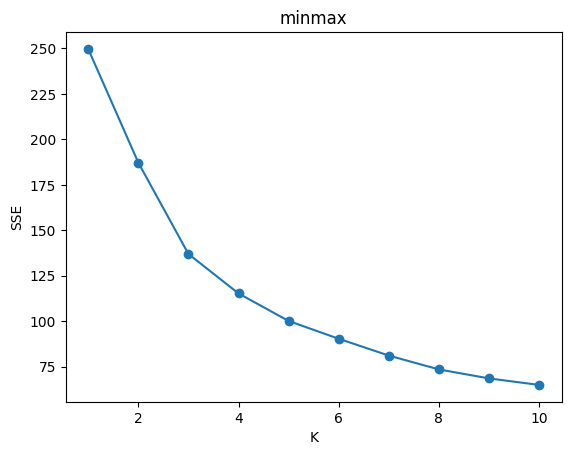

/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-project/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mitty/Documents/GitHub/AML-2023-mini-pr

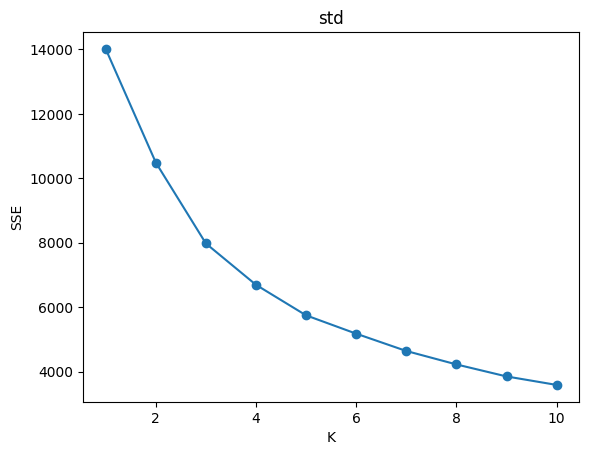

In [31]:
from sklearn.cluster import KMeans
#设置elbow函数，用于计算不同k值对应的SSE
def elbow(data, plt_name):
    sse = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    x = range(1,11)
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.title(plt_name)
    plt.plot(x,sse,'o-')
    plt.show()

#显示两种归一化方法的elbow图
elbow(df_features_daily_scaled_minmax, plt_name='minmax')
elbow(df_features_daily_scaled_std, plt_name='std')